<a href="https://colab.research.google.com/github/BU-Spark/ds-schilde-dod-contracts/blob/yuluj/yuluj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

class USASpendingAPI:
    def __init__(self, naics_code):
        self.base_url = "https://api.usaspending.gov/api/v2/"
        self.agency_filter = {
            "type": "awarding",
            "tier": "toptier",
            "name": "Department of Defense"
        }
        self.naics_code = naics_code

    def fetch_spending_data(self, from_date, to_date, psc_code):
        endpoint = f"search/spending_by_category/naics/{self.naics_code}"
        request_payload = {
            "filters": {
                "time_period": [{"start_date": from_date, "end_date": to_date}],
                "naics_codes": {"require": [self.naics_code]},
                "psc_code": {"require": [psc_code]},
                "agencies": [self.agency_filter]
            },
            "category": "naics",
            "limit": 5,
            "page": 1
        }
        response = requests.post(self.base_url + endpoint, json=request_payload)
        response.raise_for_status()  # Will raise an exception for HTTP errors.
        data = response.json()
        return data['results'] if 'results' in data else []

    def fetch_largest_contract(self, fiscal_year):
        endpoint = "search/spending_by_award/"
        fiscal_start = f"{fiscal_year}-10-01"
        fiscal_end = f"{fiscal_year+1}-09-30"
        request_payload = {
            "filters": {
                "time_period": [{"start_date": fiscal_start, "end_date": fiscal_end}],
                "naics_codes": [self.naics_code],
                "agencies": [self.agency_filter],
                "award_type_codes": ["C"]
            },
            "fields": ["Award Amount", "Recipient Name"],
            "limit": 100,
            "page": 1,
            "order": "desc",
            "sort": "Award Amount"
        }
        response = requests.post(self.base_url + endpoint, json=request_payload)
        response.raise_for_status()
        contract_data = response.json()
        return contract_data['results'] if 'results' in contract_data else []

    def annual_spending(self, start_year, end_year, psc_code):
        yearly_spending = {}
        for year in range(start_year, end_year + 1):
            from_date, to_date = f"{year}-01-01", f"{year+1}-01-01"
            data = self.fetch_spending_data(from_date, to_date, psc_code)
            yearly_spending[year] = data[0]['amount'] if data else 0
        return yearly_spending

In [ ]:
def visualize_spending(data, naics_code):
    df = pd.DataFrame({'Year': list(data.keys()), 'Spending Amount': list(data.values())})
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x="Year", y="Spending Amount", data=df, palette="viridis")
    plt.xlabel('Year')
    plt.ylabel('Spending Amount')
    plt.title(f'Annual Spending for NAICS Code {naics_code}')
    for patch in ax.patches:
        ax.annotate(f"${patch.get_height():,.2f}", (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                    ha='center', va='center', fontsize=9, color='white', xytext=(0, 10), textcoords='offset points')
    plt.show()



/var/folders/y_/_xg_kln947v4szktjdl4gmwm0000gn/T/ipykernel_3583/2695436735.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Year", y="Spending Amount", data=df, palette="viridis")


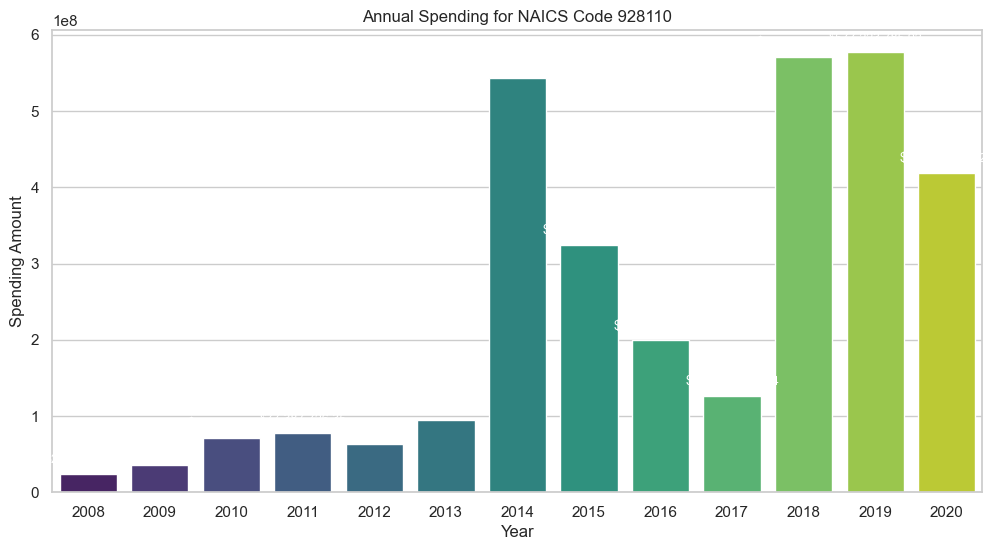

/var/folders/y_/_xg_kln947v4szktjdl4gmwm0000gn/T/ipykernel_3583/1402241965.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Year", y="Contract Value", data=df, palette="viridis")


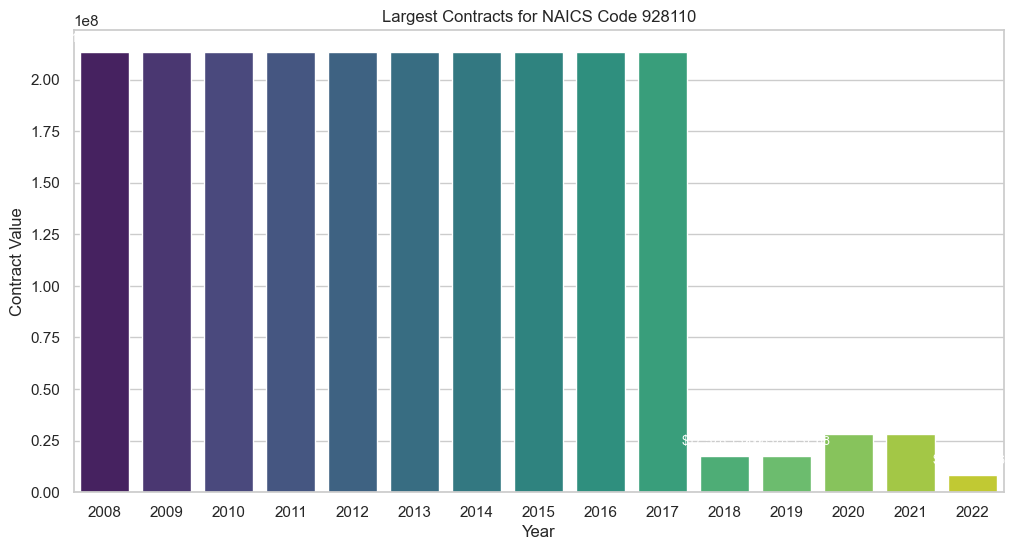

Year 2008: Highest Contract - $213,238,847.00, Recipient - BROWN & ROOT SERVICES
Year 2009: Highest Contract - $213,238,847.00, Recipient - BROWN & ROOT SERVICES
Year 2010: Highest Contract - $213,238,847.00, Recipient - BROWN & ROOT SERVICES
Year 2011: Highest Contract - $213,238,847.00, Recipient - BROWN & ROOT SERVICES
Year 2012: Highest Contract - $213,238,847.00, Recipient - BROWN & ROOT SERVICES
Year 2013: Highest Contract - $213,238,847.00, Recipient - BROWN & ROOT SERVICES
Year 2014: Highest Contract - $213,238,847.00, Recipient - BROWN & ROOT SERVICES
Year 2015: Highest Contract - $213,238,847.00, Recipient - BROWN & ROOT SERVICES
Year 2016: Highest Contract - $213,238,847.00, Recipient - BROWN & ROOT SERVICES
Year 2017: Highest Contract - $213,238,847.00, Recipient - BROWN & ROOT SERVICES
Year 2018: Highest Contract - $17,578,137.68, Recipient - GEORGIA TECH APPLIED RESEARCH CORPORATION
Year 2019: Highest Contract - $17,578,137.68, Recipient - GEORGIA TECH APPLIED RESEARCH CO

In [ ]:
def visualize_contracts(data, naics_code):
    years = list(data.keys())
    contract_values = [item['Award Amount'] if item else 0 for item in data.values()]
    df = pd.DataFrame({'Year': years, 'Contract Value': contract_values})
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x="Year", y="Contract Value", data=df, palette="viridis")
    plt.xlabel('Year')
    plt.ylabel('Contract Value')
    plt.title(f'Largest Contracts for NAICS Code {naics_code}')
    for patch in ax.patches:
        ax.annotate(f"${patch.get_height():,.2f}", (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                    ha='center', va='center', fontsize=9, color='white', xytext=(0, 10), textcoords='offset points')
    plt.show()

def main():
    naics_code = "928110"
    psc_code = "U008"
    api_client = USASpendingAPI(naics_code)

    spending_data = api_client.annual_spending(2008, 2020, psc_code)
    visualize_spending(spending_data, naics_code)

    contract_data = api_client.largest_annual_contracts(2008, 2022)
    visualize_contracts(contract_data, naics_code)
    for year, contract in contract_data.items():
        if contract:
            print(f"Year {year}: Highest Contract - ${contract['Award Amount']:,.2f}, Recipient - {contract['Recipient Name']}")

main()

In [ ]:
class USASpendingAPIEnhanced:
    def __init__(self, naics_code):
        self.base_url = "https://api.usaspending.gov/api/v2/"
        self.agency_filter = {
            "type": "awarding",
            "tier": "toptier",
            "name": "Department of Defense"
        }
        self.naics_code = naics_code

    def fetch_spending_data(self, from_date, to_date, psc_code=None):
        endpoint = f"search/spending_by_category/naics/{self.naics_code}"
        filters = {
            "time_period": [{"start_date": from_date, "end_date": to_date}],
            "naics_codes": {"require": [self.naics_code]},
            "agencies": [self.agency_filter]
        }
        if psc_code:
            filters["psc_code"] = {"require": [psc_code]}

        request_payload = {
            "filters": filters,
            "category": "naics",
            "limit": 100,  # assuming a large number to fetch all relevant data
            "page": 1
        }
        # For simplicity, we assume the API request is successful and returns data.
        # In a real-world scenario, you'd handle exceptions and check the response status.
        response = requests.post(self.base_url + endpoint, json=request_payload)
        response.raise_for_status()
        data = response.json()
        return data['results'] if 'results' in data else []

    def annual_spending_by_psc(self, start_year, end_year, psc_codes=None):
        yearly_spending = {}
        psc_codes = psc_codes or []  # if no specific PSC codes provided, fetch all

        for year in range(start_year, end_year + 1):
            from_date, to_date = f"{year}-01-01", f"{year+1}-01-01"
            if not psc_codes:  # Fetch all PSC codes
                data = self.fetch_spending_data(from_date, to_date)
                yearly_spending[year] = {entry['code']: entry['amount'] for entry in data}
            else:  # Fetch specific PSC codes
                yearly_spending[year] = {}
                for psc_code in psc_codes:
                    data = self.fetch_spending_data(from_date, to_date, psc_code)
                    if data:
                        yearly_spending[year][psc_code] = data[0]['amount']

        return yearly_spending

In [ ]:
def visualize_spending_by_psc(data, naics_code):
    df = pd.DataFrame(data).transpose()
    df.fillna(0, inplace=True)
    ax = df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap="viridis")
    plt.title(f"Annual Spending for NAICS Code {naics_code} by PSC")
    plt.ylabel("Spending Amount")
    plt.xlabel("Year")
    plt.tight_layout()
    plt.legend(title="PSC Code")
    plt.show()

In [ ]:
def main_visualization():
    naics_code = "928110"
    api_client = USASpendingAPIEnhanced(naics_code)

    # Assuming you want data for the years from 2008 to 2020
    spending_data = api_client.annual_spending_by_psc(2008, 2020)

    visualize_spending_by_psc(spending_data, naics_code)

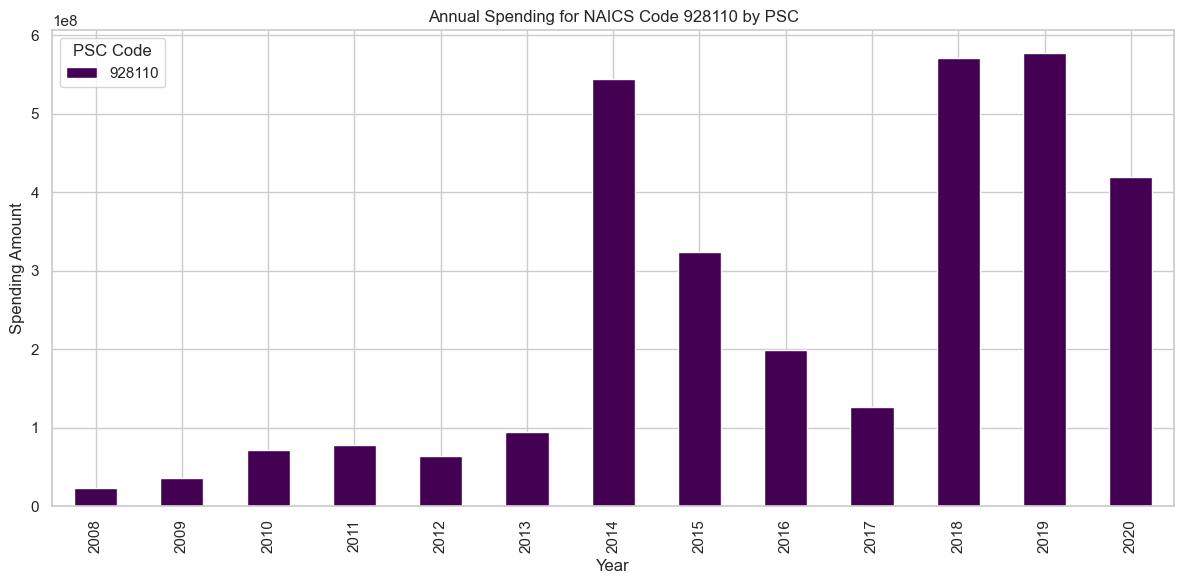

In [ ]:
api_client = USASpendingAPIEnhanced(928110)
spending_data = api_client.annual_spending_by_psc(2008, 2020)
visualize_spending_by_psc(spending_data, 928110)

In [ ]:
#test